In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0691

Best Fitness:	700.5237
Solution:	700.0000
Diff:		0.5237

[0:09:01][----------] 1.96% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9801

Best Fitness:	700.5248
Solution:	700.0000
Diff:		0.5248

[0:17:32][----------] 3.92% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0002

Best Fitness:	700.7179
Solution:	700.0000
Diff:		0.7179

[0:25:37][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9690

Best Fitness:	700.5215
Solution:	700.0000
Diff:		0.5215

[0:34:03][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9660

Best Fitness:	700.4564
Solution:	700.0000
Diff:		0.4564

[0:41:51][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9454

Best Fitness:	700.5175
Solution:	700.0000
Diff:		0.5175

[0:49:04][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0022

Best Fitness:	700.4521
Solution:	700.0000
Diff:		0.4521

[0:55:47][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9375

Best Fitness:	700.3711
Solution:	700.0000
Diff:		0.3711

[1:02:55][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9433

Best Fitness:	700.3821
Solution:	700.0000
Diff:		0.3821

[1:10:16][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9641

Best Fitness:	700.6546
Solution:	700.0000
Diff:		0.6546

[1:17:29][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9992

Best Fitness:	700.6103
Solution:	700.0000
Diff:		0.6103

[1:24:51][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0543

Best Fitness:	700.6832
Solution:	700.0000
Diff:		0.6832

[1:31:47][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9683

Best Fitness:	700.5855
Solution:	700.0000
Diff:		0.5855

[1:38:11][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0049

Best Fitness:	700.4976
Solution:	700.0000
Diff:		0.4976

[1:44:16][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0054

Best Fitness:	700.4911
Solution:	700.0000
Diff:		0.4911

[1:50:27][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0657

Best Fitness:	700.7339
Solution:	700.0000
Diff:		0.7339

[1:56:35][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9282

Best Fitness:	700.5558
Solution:	700.0000
Diff:		0.5558

[2:02:53][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9942

Best Fitness:	700.7281
Solution:	700.0000
Diff:		0.7281

[2:08:59][####------] 35.29% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0209

Best Fitness:	700.6922
Solution:	700.0000
Diff:		0.6922

[2:15:09][####------] 37.25% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0858

Best Fitness:	700.7059
Solution:	700.0000
Diff:		0.7059

[2:21:15][####------] 39.22% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9603

Best Fitness:	700.4704
Solution:	700.0000
Diff:		0.4704

[2:26:34][####------] 41.18% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9738

Best Fitness:	700.5720
Solution:	700.0000
Diff:		0.5720

[2:31:54][####------] 43.14% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0830

Best Fitness:	700.7944
Solution:	700.0000
Diff:		0.7944

[2:37:09][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0507

Best Fitness:	700.7165
Solution:	700.0000
Diff:		0.7165

[2:42:39][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0263

Best Fitness:	700.6410
Solution:	700.0000
Diff:		0.6410

[2:47:54][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9909

Best Fitness:	700.6196
Solution:	700.0000
Diff:		0.6196

[2:53:08][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9492

Best Fitness:	700.4041
Solution:	700.0000
Diff:		0.4041

[2:58:25][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0081

Best Fitness:	700.6320
Solution:	700.0000
Diff:		0.6320

[3:03:51][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9794

Best Fitness:	700.5577
Solution:	700.0000
Diff:		0.5577

[3:08:46][######----] 56.86% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0179

Best Fitness:	700.6335
Solution:	700.0000
Diff:		0.6335

[3:13:21][######----] 58.82% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0128

Best Fitness:	700.5606
Solution:	700.0000
Diff:		0.5606

[3:17:54][######----] 60.78% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0691

Best Fitness:	700.7549
Solution:	700.0000
Diff:		0.7549

[3:22:27][######----] 62.75% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9843

Best Fitness:	700.6233
Solution:	700.0000
Diff:		0.6233

[3:27:07][######----] 64.71% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0200

Best Fitness:	700.6609
Solution:	700.0000
Diff:		0.6609

[3:31:41][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0125

Best Fitness:	700.6471
Solution:	700.0000
Diff:		0.6471

[3:36:14][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0462

Best Fitness:	700.6494
Solution:	700.0000
Diff:		0.6494

[3:40:45][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9923

Best Fitness:	700.5956
Solution:	700.0000
Diff:		0.5956

[3:44:46][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9917

Best Fitness:	700.6313
Solution:	700.0000
Diff:		0.6313

[3:48:37][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9731

Best Fitness:	700.5200
Solution:	700.0000
Diff:		0.5200

[3:52:25][########--] 76.47% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9974

Best Fitness:	700.6416
Solution:	700.0000
Diff:		0.6416

[3:56:12][########--] 78.43% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0466

Best Fitness:	700.6536
Solution:	700.0000
Diff:		0.6536

[3:59:55][########--] 80.39% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0223

Best Fitness:	700.6297
Solution:	700.0000
Diff:		0.6297

[4:03:41][########--] 82.35% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.1029

Best Fitness:	700.7078
Solution:	700.0000
Diff:		0.7078

[4:07:30][########--] 84.31% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9184

Best Fitness:	700.2055
Solution:	700.0000
Diff:		0.2055

[4:11:11][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9537

Best Fitness:	700.6161
Solution:	700.0000
Diff:		0.6161

[4:14:20][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0055

Best Fitness:	700.5872
Solution:	700.0000
Diff:		0.5872

[4:17:21][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9210

Best Fitness:	700.2491
Solution:	700.0000
Diff:		0.2491

[4:20:24][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0090

Best Fitness:	700.7034
Solution:	700.0000
Diff:		0.7034

[4:23:25][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9797

Best Fitness:	700.6408
Solution:	700.0000
Diff:		0.6408

[4:26:26][##########] 96.08% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	701.0439

Best Fitness:	700.6793
Solution:	700.0000
Diff:		0.6793

[4:29:34][##########] 98.04% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	700.9621

Best Fitness:	700.4524
Solution:	700.0000
Diff:		0.4524

[4:32:51][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:32:51

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
226,0.952366,1.043355,0.928672,0.936814,1.024749,0.986079,1.023075,0.97454,1.02573,0.863574,...,1.024748,0.994803,0.983628,1.034986,1.01466,0.498722,0.978577,0.988626,0.897788,50
227,0.952366,1.043355,0.928672,0.936814,1.024749,0.986079,1.023075,0.97454,1.02573,0.863574,...,1.024748,0.994803,0.983628,1.034986,1.01466,0.498722,0.978577,0.988626,0.897788,50
228,0.952366,1.043355,0.928672,0.936814,1.024749,0.986079,1.023075,0.97454,1.02573,0.863574,...,1.024748,0.994803,0.983628,1.034986,1.01466,0.498722,0.978577,0.988626,0.897788,50
229,0.952366,1.043355,0.928672,0.936814,1.024749,0.986079,1.023075,0.97454,1.02573,0.863574,...,1.024748,0.994803,0.983628,1.034986,1.01466,0.498722,0.978577,0.988626,0.897788,50
230,0.952366,1.043355,0.928672,0.936814,1.024749,0.986079,1.023075,0.97454,1.02573,0.863574,...,1.024748,0.994803,0.983628,1.034986,1.01466,0.498722,0.978577,0.988626,0.897788,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.5236685748837999

Best error for run 1: 0.5248364524038607

Best error for run 2: 0.7178969159785993

Best error for run 3: 0.5215440641663918

Best error for run 4: 0.45638119844750236

Best error for run 5: 0.5175300461035022

Best error for run 6: 0.45208685974171203

Best error for run 7: 0.37112848168817436

Best error for run 8: 0.38205622860311905

Best error for run 9: 0.6546159161531477

Best error for run 10: 0.6103371266457316

Best error for run 11: 0.6831737897249468

Best error for run 12: 0.5854874042413485

Best error for run 13: 0.49759550852820666

Best error for run 14: 0.4911198405241066

Best error for run 15: 0.7339211987243743

Best error for run 16: 0.5558430556834537

Best error for run 17: 0.7280831883809924

Best error for run 18: 0.6921710408412309

Best error for run 19: 0.7058679936681074

Best error for run 20: 0.4704122052235107

Best error for run 21: 0.5720174453765594

Best error for run 22: 0.794361273945924

Best error for run 23: 0.7164720421091033

Best error for run 24: 0.6409974578357378

Best error for run 25: 0.6196097243696386

Best error for run 26: 0.4040773868018732

Best error for run 27: 0.6320213552179439

Best error for run 28: 0.5577357348407759

Best error for run 29: 0.633462348388889

Best error for run 30: 0.5606080144008274

Best error for run 31: 0.754854310128394

Best error for run 32: 0.6232915711518672

Best error for run 33: 0.6608678492480067

Best error for run 34: 0.6471115864518424

Best error for run 35: 0.6493817955600889

Best error for run 36: 0.5956226656464878

Best error for run 37: 0.6313380716165966

Best error for run 38: 0.52002096946444

Best error for run 39: 0.6416016536478537

Best error for run 40: 0.6536260548999735

Best error for run 41: 0.6297227005003379

Best error for run 42: 0.707847170433979

Best error for run 43: 0.2055144398923403

Best error for run 44: 0.616066867590007

Best error for run 45: 0.5871916026923145

Best error for run 46: 0.24914481618350237

Best error for run 47: 0.7034071259902248

Best error for run 48: 0.6407664082545352

Best error for run 49: 0.6792756597693597

Best error for run 50: 0.45242108475713394

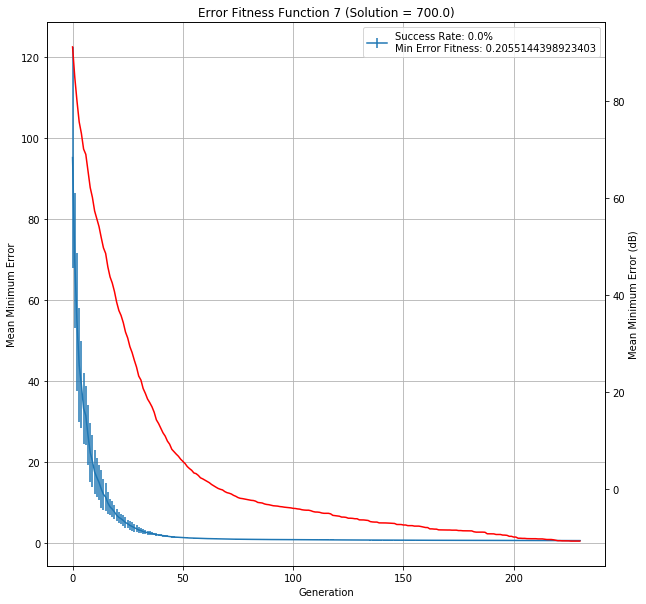

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.7,0.523669,0.524836,0.717897,0.521544,0.456381,0.51753,...,0.616067,0.587192,0.249145,0.703407,0.640766,0.679276,0.452421,0.585416,4:32:51,69900
